# Data Science - Visualization

### The goals of data visualization are to help with your own understanding of the data/results and to communicate the results/conclusions to others. Data can be visualized in many different ways. Below are some points to keep in mind as you design your visualization of your data.

### - Keep axis scales consistent. (Consider the scale when comparing similar data).
### - Choose axis limits that fills the visualization. (Multiple plots can be used to show different areas of interests).
### - Use a perceptually uniform color map. (Use color to highlight data type).
### - Markings plays a significant role in the accuracy of our judgements. (Avoid using pie charts, area charts, word cloud, and stacked charts).
### - Use conditioning to aid comparison.
### - The chosen visual metric tells the story.

### In this notebook, we will introduce the commonly used plots for data visualization. 

## Set Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the insurance data.
insuranceDF = pd.read_csv("data/insurance.csv")
insuranceDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Structure of Plots

### There are many components that make up a figure and many different ways to format the visualization. Below is an example of how one might format their visualization.

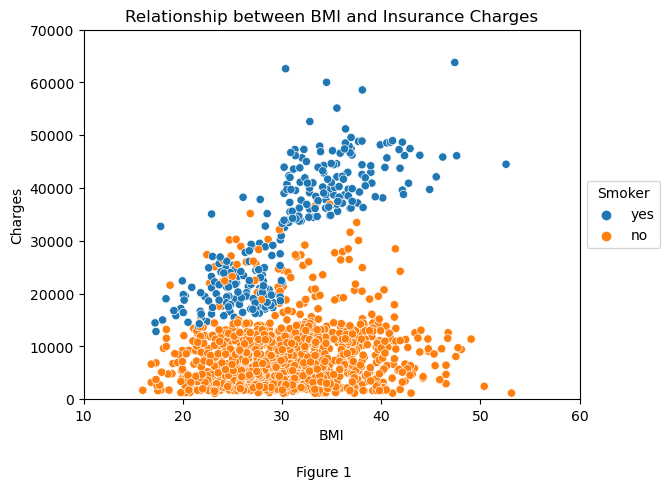

In [3]:
# Scatter plot.
fig = sns.scatterplot(data=insuranceDF, x="bmi", y="charges", hue="smoker")
# Figure title.
plt.title("Relationship between BMI and Insurance Charges")
# Figure x-axis label.
plt.xlabel("BMI")
# Figure y-axis label.
plt.ylabel("Charges")
# Figure x-axis range.
plt.xlim(10, 60)
# Figure y-axis range.
plt.ylim(0, 70000)
# Figure legend.
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Smoker")
# Figure caption/text.
plt.figtext(0.5, -0.05, "Figure 1", ha="center")
# Display the figure.
plt.show(fig);

### For simplicity, all the plots below will be shown as default without additional format changes.

## Plots to Compare Discrete Counts/Numbers

### A bar graph is used to compare qualitative variables. 

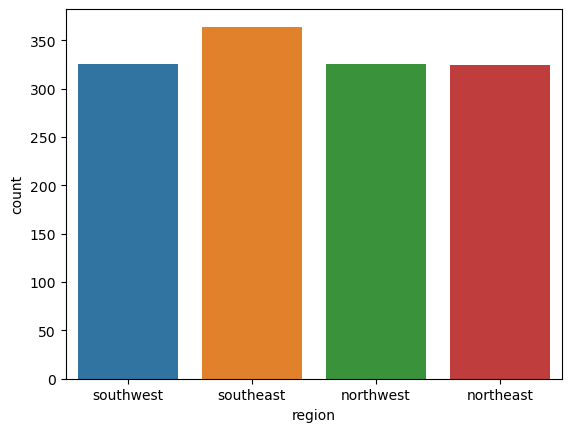

In [4]:
# A countplot is a specific form of bar plot that plots the number of occurrences instead of a pre-defined number.
sns.countplot(data=insuranceDF, x="region")
plt.show();

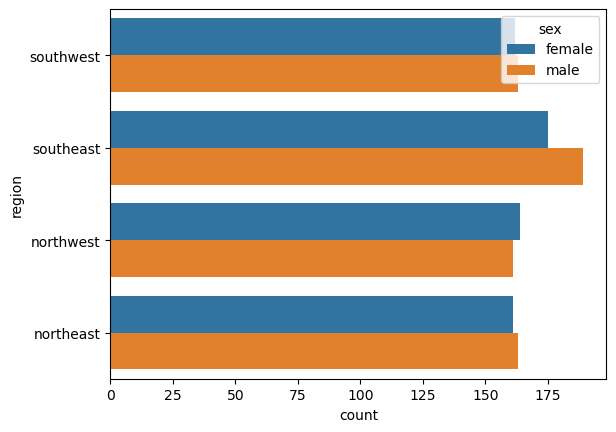

In [5]:
# Note: The axis in which the data is plot can be changed. 
sns.countplot(data=insuranceDF, y="region", hue="sex")
plt.show();

## Plots to Compare Distributions

### A histogram is used to determine the distribution of quantitative variables.

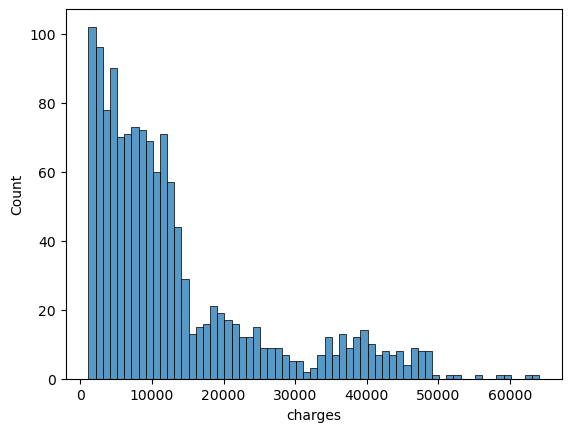

In [6]:
sns.histplot(data=insuranceDF, x="charges", binwidth=1000)
plt.show();

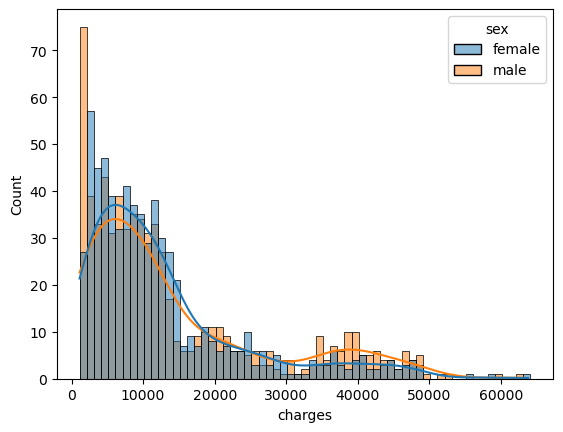

In [7]:
# The kde parameter for hisplot will produce a smooth density curve along with the histogram.
sns.histplot(data=insuranceDF, x="charges", hue="sex", binwidth=1000, kde=True)
plt.show();

### A box plot is another method to compare distribution.

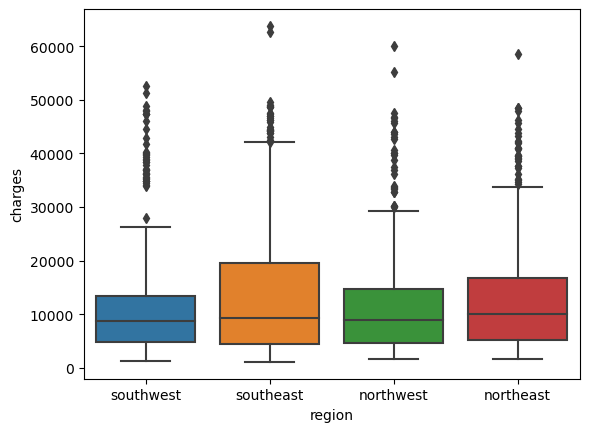

In [8]:
sns.boxplot(data=insuranceDF, x="region", y="charges")
plt.show();

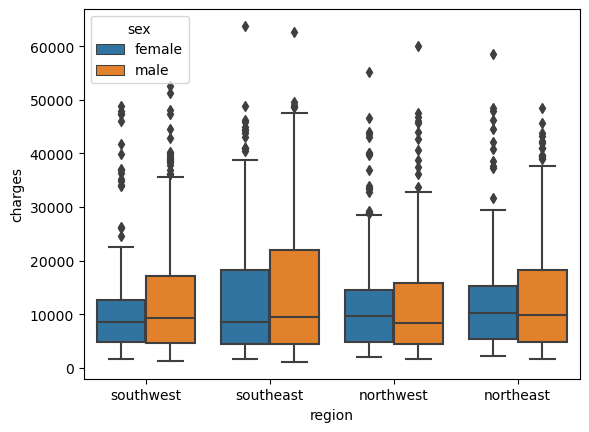

In [9]:
sns.boxplot(data=insuranceDF, x="region", y="charges", hue="sex")
plt.show();

### A violin plot is essentially a box plot, but allows for better comparison of distribution of each variable.

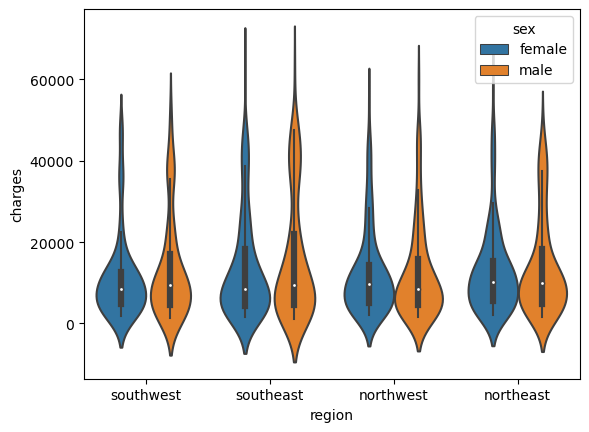

In [10]:
sns.violinplot(data=insuranceDF, x="region", y="charges", hue="sex")
plt.show();

## Plots to Depict Relationships

### A line plot is used to depict relationships between pairs of numerical variables.

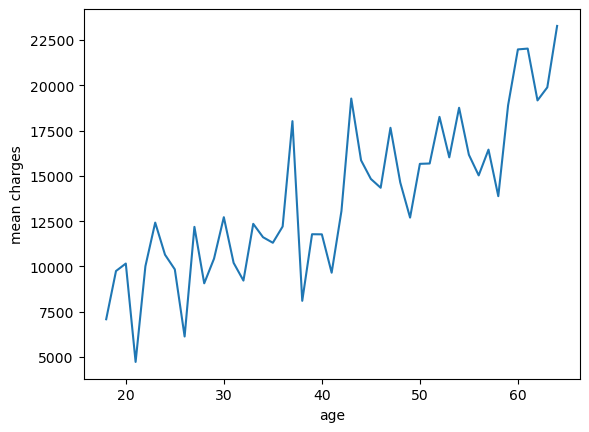

In [11]:
# Calculate the mean charge by age.
meanChargeByAgeDF = (insuranceDF.groupby("age").agg("mean")
                                .reset_index()[["age", "charges"]]
                                .rename(columns={"charges": "mean charges"}))

sns.lineplot(data=meanChargeByAgeDF, x="age", y="mean charges")
plt.show();

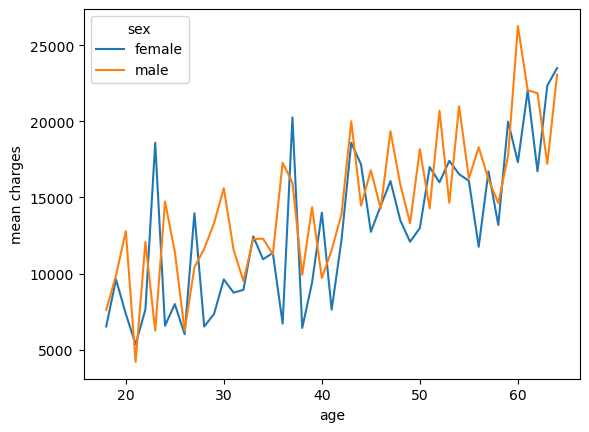

In [12]:
# Calculate the mean charge by age and sex.
meanChargeByAgeSexDF = (insuranceDF.groupby(["age", "sex"]).agg("mean")
                                   .reset_index()[["age", "sex", "charges"]]
                                   .rename(columns={"charges": "mean charges"}))

sns.lineplot(data=meanChargeByAgeSexDF, x="age", y="mean charges", hue="sex")
plt.show();

### A scatter plot is another method to depict relationships between pairs of numerical variables. Generally speaking, a scatter plot is a better choice for visualization compared to line plots.

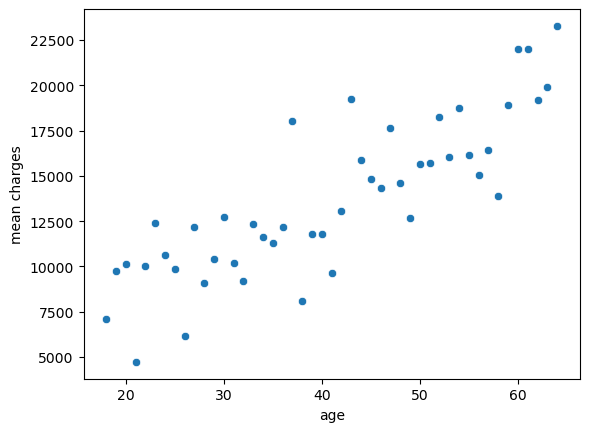

In [13]:
sns.scatterplot(data=meanChargeByAgeDF, x="age", y="mean charges")
plt.show();

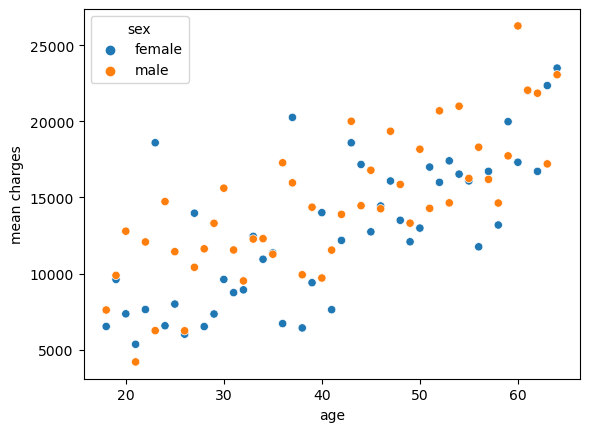

In [14]:
sns.scatterplot(data=meanChargeByAgeSexDF, x="age", y="mean charges", hue="sex")
plt.show();

### For more information, check the following:

### - User Guide (Seaborn): https://seaborn.pydata.org/tutorial.html
### - User Guide (Matplotlib): https://matplotlib.org/stable/tutorials/index
### - API Reference (Seaborn): https://seaborn.pydata.org/api.html
### - API Reference (Matplotlib): https://matplotlib.org/stable/api/index.html
### - Examples (Seaborn): https://seaborn.pydata.org/examples/index.html
### - Examples (Matplotlib): https://matplotlib.org/stable/gallery/index.html

## Plot Transformations

### There might be times when the plots need to be mathematically manipulated (or transformed) in order to generate a more meaningful plot. A commonly used plot transformation is a log transformation on one (or both) of the axis.

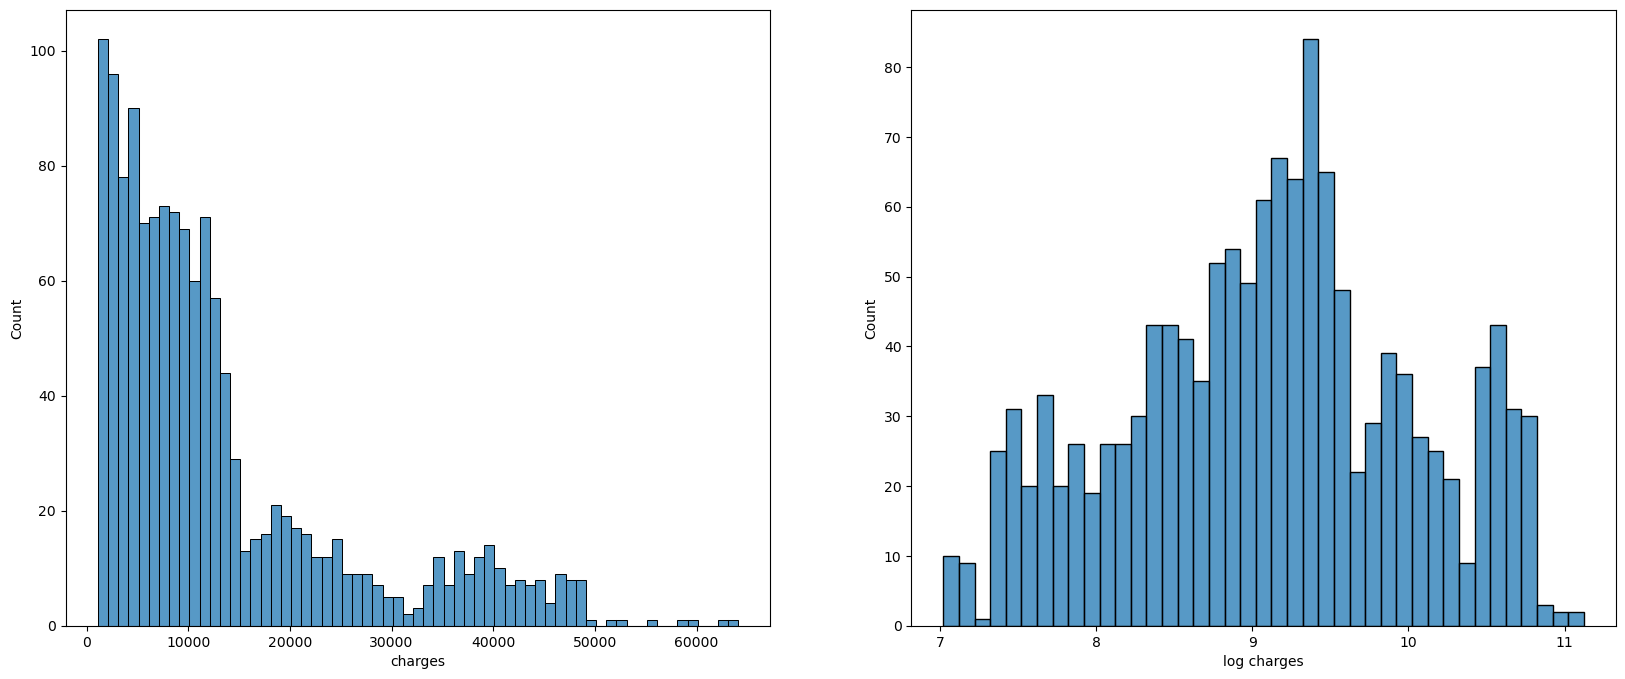

In [15]:
# Log transform the insurance charges.
insuranceDF['log charges'] = np.log(insuranceDF['charges'])

# Creates the two plots side by side.
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(data=insuranceDF, x="charges", binwidth=1000, ax=ax[0])
sns.histplot(data=insuranceDF, x="log charges", binwidth=.1, ax=ax[1])
plt.show();

### By log transforming the insurance charges, we have made the distribution much more symmetric/normalized than before.

### Similarly, log transformation can be used to change the shape of the scatter plot.

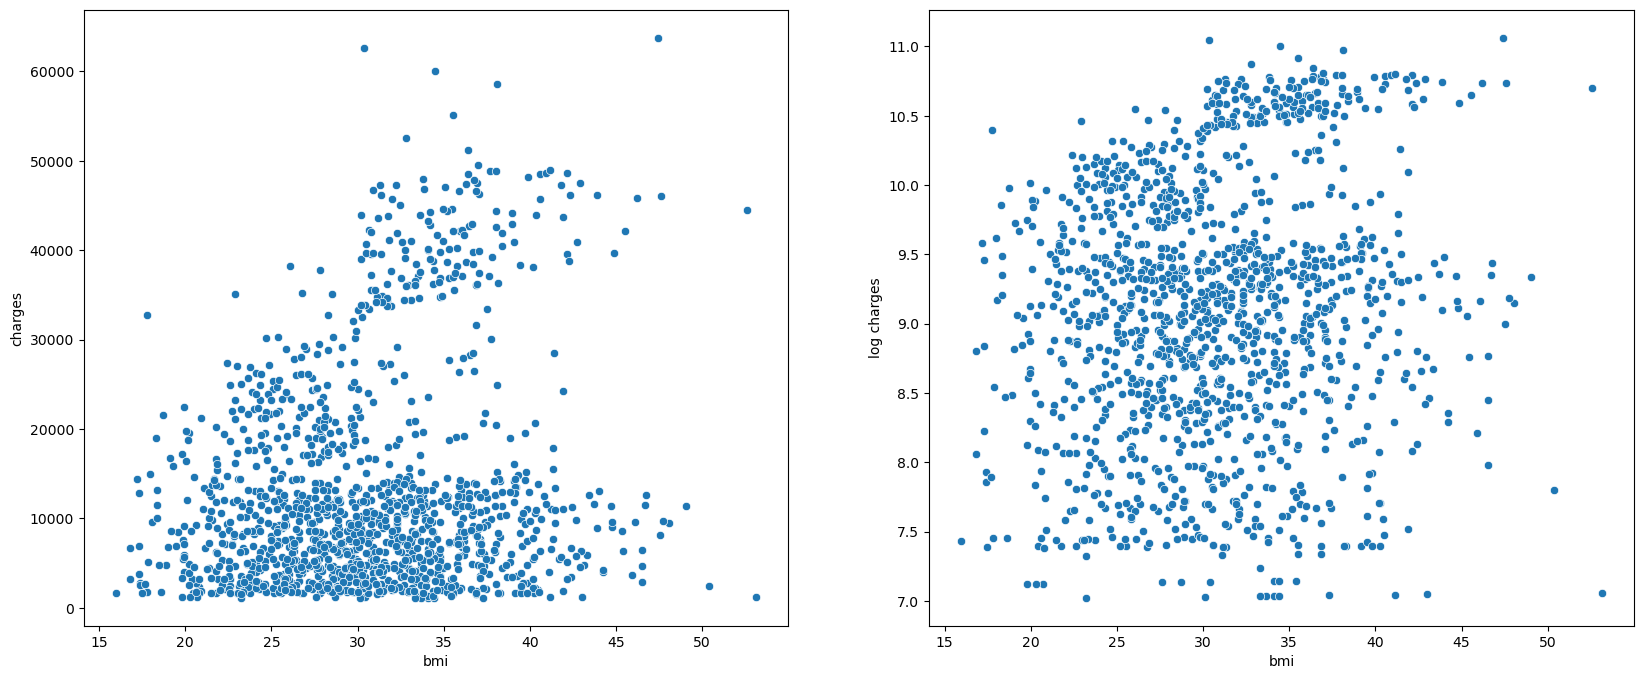

In [16]:
# Creates the two plots side by side.
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.scatterplot(data=insuranceDF, x="bmi", y="charges", ax=ax[0])
sns.scatterplot(data=insuranceDF, x="bmi", y="log charges", ax=ax[1])
plt.show();

**Source:**


Module adapted from Kaggle: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/notebook

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets